# Predict ARPU

We'd like you to build a model that predicts the ARPU quality of the pub_id traffic. 

We will use two methods to evaluate your data: D7 ARPU and Total Revenue ARPU. If you build a full model we can run that on an additional set of data for Feb 15 - March 15 which was not included below.  To back up your model, please provide 2 - 3 data visualizations that help to explain the rational behind your models, weights and findings.

The goal of the test is to work together with data that we at Bubbleye are familiar with. We do not expect you to build a model that works perfectly, or even at all, but we do expect to see a demonstration of your abilities and communication skills. To that end, please feel free to ask us any questions or even schedule a call to go over the example data.

When you've completed your work, please share to us the model so we can familiarize ourselves with the code. Then we can schedule a time to go over the model and your results together.

Model:
- Predict which traffic will provide the best D7 ARPU

Visualization Examples:
- Plots that show evidence for your model's hypothesis
- Plots that show your model in action
- Plots that describe any weights or rules your model uses

Data Explanation:
This data represents a game's installs, revenue and retained users over time. 

The data is aggregated to the following dimensions:
- date: when the installs occurred
- geo: the geographic region where the installs were generated
- campaign: the advertising campaign being run to attract installs
- pub_id: the publisher that displayed the ad and thus delivered clicks and installs

The metrics are briefly:
- accepted_installs: Installs of the game as defined by a third-party tracking platform (MMP) from that date
- spend: Amount in USD that was spent to run ads on that day
- revenue: Total amount of revenue generated that day
- d(x)_revenue: The revenue that occured within the x number of days after 'date'
- d(x)_retained_users: Number of users who launched the game being advertised, on the x'th day after 'date'

If you'd like to check some jargon here are some key terms and definitions:

Key Industry Definitions:
- ARPU - Average Revenue Per User (revenue/accepted_installs)
- Cohorted data, which leads to D1, D3, D7 metrics
- ROAS - Return on Ad Spend, (revenue/spend)
- CPI - Cost per Install (spend/installs)

- ECPI - (https://www.appsflyer.com/product/cost-ecpi-ecpa-and-roi-reporting/)

AppsFlyer also uses cost data to calculate each app and campaign’s effective cost per install (total cost divided by total number of installs), and effective cost per action per in-app event (total cost divided by the number of times the event in question was recorded). Unlike CPI or CPA, the ‘e’ tells you how much you paid (on average) for a new user. This is particularly important when the app experiences some level of viral growth (organic multipliers). Why is this important? Let’ explore the following examples:

eCPI Example:
If you paid $1000 for 1000 installs your CPI is $1. But since the 1,000 installs also had a viral effect (an organic multiplier of .5), the number of new installs actually hit 1,500 which means the eCPI was 66 cents. If that’s how much you pay for a user, you know you need to make at least 67 cents (not $1.01) to be ROI positive. Remember the golden rule for successful app marketers: LTV > eCPI.

eCPA Example
If your total cost is $55,000 and your defined action “reached level 10” was recorded 2,000 times, than your eCPA is $27.5. Once again, this creates your LTV target (higher than $27.5) as you work towards achieving a positive ROI.

---

# Load and check data

In [1]:
%load_ext nb_black

import numpy as np
import pandas as pd

<IPython.core.display.Javascript object>

In [2]:
data = pd.read_csv("2019-01-01_2020-02-15_encrypted.csv")

print(data.info())
display(data.head(5))
display(data.tail(5))
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104435 entries, 0 to 104434
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date                104435 non-null  object 
 1   geo                 104435 non-null  object 
 2   campaign            104435 non-null  object 
 3   pub_id              104435 non-null  object 
 4   accepted_installs   104435 non-null  int64  
 5   spend               104435 non-null  float64
 6   ecpi                104435 non-null  float64
 7   d3_revenue          104435 non-null  float64
 8   revenue             104435 non-null  float64
 9   d1_revenue          104435 non-null  float64
 10  d30_revenue         104435 non-null  float64
 11  d7_revenue          104435 non-null  float64
 12  d14_revenue         104435 non-null  float64
 13  d30_retained_users  104435 non-null  float64
 14  d7_retained_users   104435 non-null  float64
 15  d14_retained_users  104435 non-nul

,date,geo,campaign,pub_id,accepted_installs,spend,ecpi,d3_revenue,revenue,d1_revenue,d30_revenue,d7_revenue,d14_revenue,d30_retained_users,d7_retained_users,d14_retained_users,d3_retained_users,d1_retained_users
0,2019-01-01,AT,wqbDosK5a8KAasKtw5XCtcKTeWvCmcKTwovCuWLCoGzCus...,c8KlwoJ8woPCgHY=,2,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
1,2019-01-01,AT,wqbDosK5a8KAasKtw5XCtcKTeWvCmcKTwovCuWLCoGzCus...,c8KlwoLCgMKL,2,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
2,2019-01-01,AT,wqbDosK5a8KAasKtw5XCtcKTeWvCmcKTwovCuWLCoGzCus...,dMKrfMKBwoZ6ew==,2,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
3,2019-01-01,AT,wqbDosK5a8KAasKtw5XCtcKTeWvCmcKTwovCuWLCoGzCus...,dsKmwoDChMKD,2,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
4,2019-01-01,BE,wqbDosK5a8KAasKtw5XCtcKTeWvCocKZwpbCqsKLwrbCn2...,c8KlwoN-woN_dw==,2,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0


,date,geo,campaign,pub_id,accepted_installs,spend,ecpi,d3_revenue,revenue,d1_revenue,d30_revenue,d7_revenue,d14_revenue,d30_retained_users,d7_retained_users,d14_retained_users,d3_retained_users,d1_retained_users
104430,2020-02-14,US,wobDosK5wqrCmcKvwqbDmMK3w5TCvsOEwrLCn8Kyw4_Cts...,ecKswoB_wos=,1,2.20,2.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104431,2020-02-14,US,wobDosK5wqrCmcKvwqbDmMK3w5TCvsOEwrLCn8Kyw4_Cts...,esKsfsKCwos=,1,6.00,6.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104432,2020-02-14,US,wobDosK5wqrCmcKvwqbDmMK3w5TCvsOEwrLCn8Kyw4_Cts...,e8KkwoV8wok=,1,6.00,6.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104433,2020-02-14,US,wobDosK5wqrCmcKvwqbDmMK3w5TCvsOEwrLCn8Kyw4_Cts...,dcKkwoLCgMKKe3o=,1,7.45,7.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104434,2020-02-14,US,wobDosK5wqrCmcKvwqbDmMK3w5TCvsOEwrLCn8Kyw4_Cts...,dcKmwoF-wofCg3U=,1,5.10,5.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,accepted_installs,spend,ecpi,d3_revenue,revenue,d1_revenue,d30_revenue,d7_revenue,d14_revenue,d30_retained_users,d7_retained_users,d14_retained_users,d3_retained_users,d1_retained_users
count,104435.000000,104435.000000,104435.000000,104435.000000,104435.000000,104435.000000,104435.000000,104435.000000,104435.000000,104435.000000,104435.000000,104435.000000,104435.000000,104435.000000
mean,13.459673,59.136441,49.437057,3.620567,10.782532,2.541196,10.782532,5.293320,7.326826,11.458764,11.552085,11.481869,11.567425,11.565088
std,20.048608,104.111410,71.596643,92.094257,304.477025,72.618058,304.477025,127.315487,190.336601,18.697897,18.772453,18.749210,18.928023,19.012806
min,0.000000,0.000000,-30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.700000,3.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,8.100000,6.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,30.000000,82.500000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,30.000000,30.000000,30.000000,30.000000
max,510.000000,2940.000000,471.000000,9818.700000,50854.800000,8022.600000,50854.800000,16656.000000,32079.900000,450.000000,450.000000,450.000000,480.000000,480.000000


<IPython.core.display.Javascript object>

---

# Exploratory data analysis

- **After taking log with arpu, roas, We could observe the correlation between them and d7 ARPU**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5db33ea5c0>,
      dtype=object)

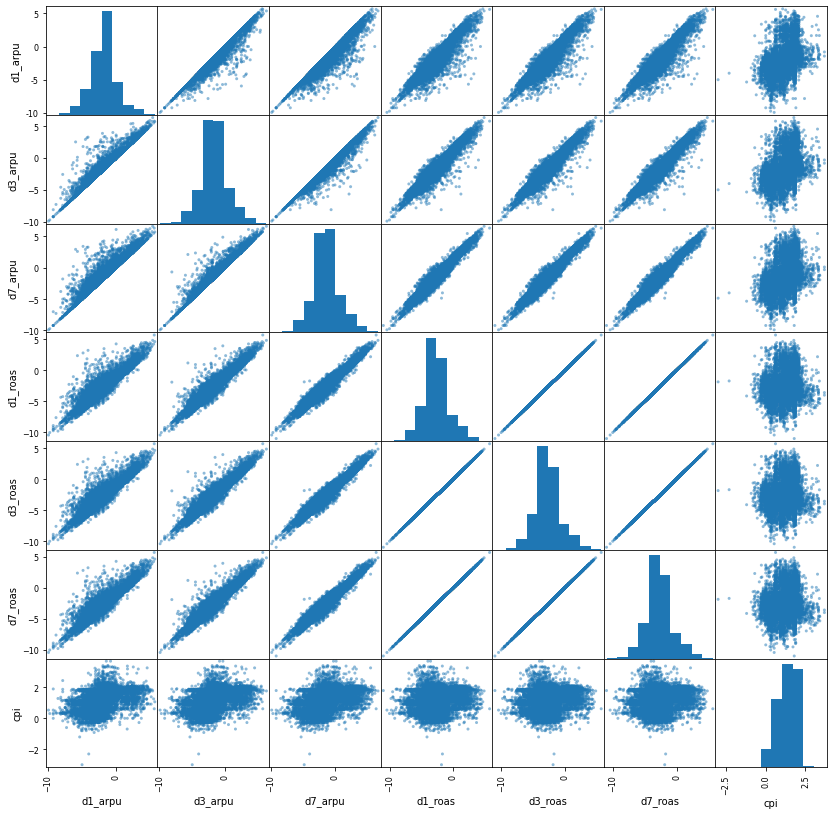

<IPython.core.display.Javascript object>

In [3]:
pd.plotting.scatter_matrix(
    data.assign(
        d1_arpu=lambda x: x.d1_revenue / x.accepted_installs,
        d3_arpu=lambda x: x.d3_revenue / x.accepted_installs,
        d7_arpu=lambda x: x.d7_revenue / x.accepted_installs,
        d1_roas=lambda x: x.d7_revenue / x.spend,
        d3_roas=lambda x: x.d7_revenue / x.spend,
        d7_roas=lambda x: x.d7_revenue / x.spend,
        cpi=lambda x: x.spend / x.accepted_installs,
    )
    .loc[:, "d1_arpu":]
    .apply(np.log)
    .replace([np.inf, -np.inf], np.nan),
    figsize=(14, 14),
)

- **"accepted_installs" is proportional to "spend"**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5dafc60710>,
      dtype=object)

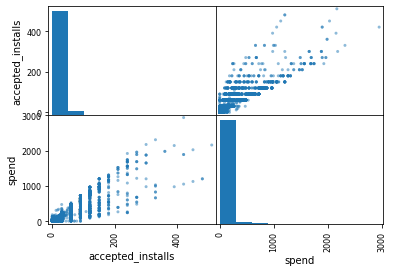

<IPython.core.display.Javascript object>

In [4]:
pd.plotting.scatter_matrix(data.loc[:, ["accepted_installs", "spend"]])

- **Most of the "spend" is distributed between April and November, wednesday and weekend**

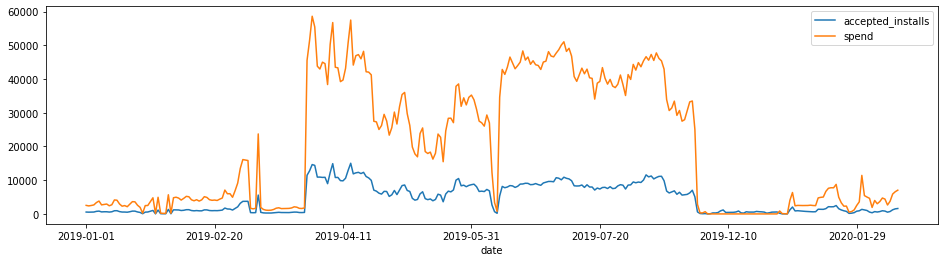

<IPython.core.display.Javascript object>

In [5]:
data.groupby("date").sum().loc[:, ["accepted_installs", "spend"]].plot(figsize=(16, 4))

weekday,0,1,2,3,4,5,6
accepted_installs,14.461591,13.049067,13.113174,13.736996,12.742910,13.087824,14.213571
spend,63.920699,57.523060,57.499309,60.710800,56.851857,56.929742,61.472686
ecpi,53.330569,48.090997,48.320756,50.945663,47.664553,47.365969,51.175644
d3_revenue,4.027337,4.168835,3.466715,4.098249,2.139430,3.725925,3.854952
revenue,14.272772,11.856423,8.120709,13.009997,6.491025,10.838585,11.567711
d1_revenue,2.690908,3.013190,2.442116,2.877049,1.705480,2.406756,2.751141
d30_revenue,14.272772,11.856423,8.120709,13.009997,6.491025,10.838585,11.567711
d7_revenue,5.893162,5.653203,4.488735,6.672800,3.327229,5.310462,5.925630
d14_revenue,9.419146,8.006181,5.779686,8.641455,4.564279,7.330883,7.963443
d30_retained_users,12.340541,11.021988,11.042042,11.807991,10.755310,11.191882,12.211101


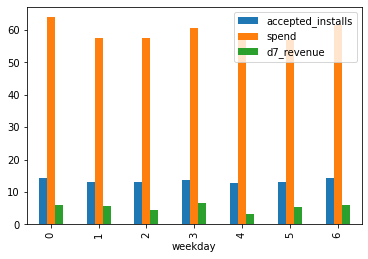

<IPython.core.display.Javascript object>

In [6]:
display(
    data.assign(weekday=lambda x: pd.DatetimeIndex(x.date).weekday)
    .groupby(["weekday"])
    .mean()
    .T
)

data.assign(weekday=lambda x: pd.DatetimeIndex(x.date).weekday).groupby(
    ["weekday"]
).mean().loc[:, ["accepted_installs", "spend", "d7_revenue"]].plot.bar()

- **Most of the "spend" is distributed in North America and Europe**

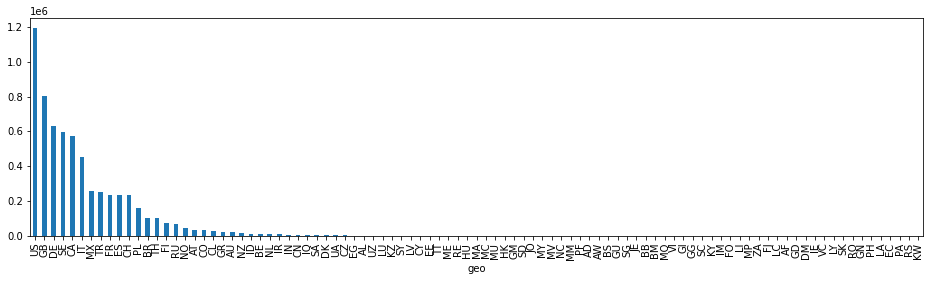

<IPython.core.display.Javascript object>

In [7]:
data.groupby(["geo"]).sum().sort_values(by=["spend"], ascending=False).spend.T.plot.bar(
    figsize=(16, 4)
)

# Questions about this dataset

- **Why the "zero-spend" still got "accepted_installs"? Is this meaningful for marketing?**

In [8]:
data.query("spend==0&accepted_installs>0").describe()

,accepted_installs,spend,ecpi,d3_revenue,revenue,d1_revenue,d30_revenue,d7_revenue,d14_revenue,d30_retained_users,d7_retained_users,d14_retained_users,d3_retained_users,d1_retained_users
count,9216.000000,9216.0,9216.0,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000
mean,2.615234,0.0,0.0,0.816530,2.227593,0.533437,2.227593,1.283053,1.730660,0.144097,0.278537,0.160373,0.270725,0.244900
std,5.984495,0.0,0.0,10.981436,43.254009,8.869711,43.254009,19.104787,28.649232,1.112385,1.278734,1.122114,1.268575,1.247037
min,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.0,0.0,0.243900,0.335475,0.145200,0.335475,0.289600,0.290300,0.000000,0.000000,0.000000,0.000000,0.000000
max,90.000000,0.0,0.0,630.909500,3731.534213,630.764600,3731.534213,1316.349852,2291.534811,29.000000,29.000000,29.000000,29.000000,31.000000


<IPython.core.display.Javascript object>

---

# Feature pipeline

In [9]:
dataset = data.replace([0], 1e-8).assign(
    log_accepted_installs=lambda x: np.log(x.accepted_installs),
    log_spend=lambda x: np.log(x.spend),
    log_d1_revenue=lambda x: np.log(x.d1_revenue),
    log_d3_revenue=lambda x: np.log(x.d3_revenue),
    log_d1_roas=lambda x: x.log_d1_revenue - x.log_spend,
    log_d3_roas=lambda x: x.log_d3_revenue - x.log_spend,
    log_d1_arpu=lambda x: x.log_d1_revenue - x.log_accepted_installs,
    log_d3_arpu=lambda x: x.log_d3_revenue - x.log_accepted_installs,
    log_d7_arpu=lambda x: np.log(x.d7_revenue) - x.log_accepted_installs,  # Label
    log_d31_revenue_ratio=lambda x: x.log_d3_revenue - x.log_d1_revenue,
    log_d31_roas_ratio=lambda x: x.log_d3_roas - x.log_d1_roas,
    log_d31_arpu_ratio=lambda x: x.log_d3_arpu - x.log_d1_arpu,
    # weekday=lambda x: pd.DatetimeIndex(x.date).weekday,
    # log_ecpi=lambda x: np.log(x.ecpi),
    # log_d1_retained_users=lambda x: np.log(x.d1_retained_users),
    # log_d3_retained_users=lambda x: np.log(x.d3_retained_users),
    # log_cpi=lambda x: x.log_spend - x.log_accepted_installs,
    # log_d31_retained_ratio=lambda x: x.log_d3_retained_users - x.log_d1_retained_users,
    # log_d3_retained_ratio=lambda x: x.log_d3_retained_users - x.log_accepted_installs,
    # log_d1_retained_ratio=lambda x: x.log_d1_retained_users - x.log_accepted_installs,
)

<IPython.core.display.Javascript object>

In [10]:
dataset.describe()

,accepted_installs,spend,ecpi,d3_revenue,revenue,d1_revenue,d30_revenue,d7_revenue,d14_revenue,d30_retained_users,...,log_d1_revenue,log_d3_revenue,log_d1_roas,log_d3_roas,log_d1_arpu,log_d3_arpu,log_d7_arpu,log_d31_revenue_ratio,log_d31_roas_ratio,log_d31_arpu_ratio
count,1.044350e+05,1.044350e+05,104435.000000,1.044350e+05,1.044350e+05,1.044350e+05,1.044350e+05,1.044350e+05,1.044350e+05,1.044350e+05,...,104435.000000,104435.000000,104435.000000,104435.000000,104435.000000,104435.000000,104435.000000,104435.000000,104435.000000,104435.000000
mean,1.345967e+01,5.913644e+01,49.437057,3.620567e+00,1.078253e+01,2.541196e+00,1.078253e+01,5.293320e+00,7.326826e+00,1.145876e+01,...,-16.211589,-16.008361,-17.193201,-16.989973,-17.565155,-17.361927,-17.192967,0.203228,0.203228,0.203228
std,2.004861e+01,1.041114e+02,71.596643,9.209426e+01,3.044770e+02,7.261806e+01,3.044770e+02,1.273155e+02,1.903366e+02,1.869790e+01,...,5.807073,6.083195,9.586202,9.809900,6.558270,6.829811,7.047194,1.804379,1.804379,1.804379
min,1.000000e-08,1.000000e-08,-30.000000,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,...,-18.420681,-18.420681,-26.165684,-26.165684,-24.655091,-24.655091,-24.655091,0.000000,0.000000,0.000000
25%,1.000000e+00,3.700000e+00,3.400000,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,...,-18.420681,-18.420681,-22.738169,-22.738169,-21.821878,-21.821878,-21.821878,0.000000,0.000000,0.000000
50%,2.000000e+00,8.100000e+00,6.750000,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,2.000000e+00,...,-18.420681,-18.420681,-20.366591,-20.366591,-19.113828,-19.113828,-19.113828,0.000000,0.000000,0.000000
75%,3.000000e+01,8.250000e+01,75.000000,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,3.000000e+01,...,-18.420681,-18.420681,-19.275096,-19.113828,-18.420681,-18.420681,-18.420681,0.000000,0.000000,0.000000
max,5.100000e+02,2.940000e+03,471.000000,9.818700e+03,5.085480e+04,8.022600e+03,5.085480e+04,1.665600e+04,3.207990e+04,4.500000e+02,...,8.990018,9.192044,24.867613,24.867843,19.362249,19.789676,20.247486,25.580517,25.580517,25.580517


<IPython.core.display.Javascript object>

# Generate training and test set

In [11]:
from sklearn.model_selection import train_test_split
from catboost import Pool, CatBoostRegressor

<IPython.core.display.Javascript object>

In [12]:
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)

train_pool = Pool(
    train_set.loc[
        :,
        [
            "geo",
            "campaign",
            "pub_id",
            "log_accepted_installs",
            "log_d1_revenue",
            "log_d3_revenue",
            "log_d1_roas",
            "log_d3_roas",
            "log_d1_arpu",
            "log_d3_arpu",
            "log_d31_revenue_ratio",
            "log_d31_roas_ratio",
            "log_d31_arpu_ratio",
        ],
    ],
    label=train_set.loc[:, ["log_d7_arpu"]],
    cat_features=[0, 1, 2],
)

test_pool = Pool(
    test_set.loc[
        :,
        [
            "geo",
            "campaign",
            "pub_id",
            "log_accepted_installs",
            "log_d1_revenue",
            "log_d3_revenue",
            "log_d1_roas",
            "log_d3_roas",
            "log_d1_arpu",
            "log_d3_arpu",
            "log_d31_revenue_ratio",
            "log_d31_roas_ratio",
            "log_d31_arpu_ratio",
        ],
    ],
    label=test_set.loc[:, ["log_d7_arpu"]],
    cat_features=[0, 1, 2],
)

<IPython.core.display.Javascript object>

---

# Model training

In [13]:
# specify the training parameters
model = CatBoostRegressor(
    iterations=500, depth=6, learning_rate=0.01, loss_function="RMSE", random_seed=42,
)
# train the model
model.fit(train_pool, eval_set=test_pool, use_best_model=True, verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

<IPython.core.display.Javascript object>

# Training result

![Screen Shot](Screenshot.png)

In [14]:
display(pd.DataFrame(model.get_evals_result()["learn"]).describe())
display(pd.DataFrame(model.get_evals_result()["validation"]).describe())

,RMSE
count,500.000000
mean,2.443101
std,1.259382
min,1.673246
25%,1.688132
50%,1.787259
75%,2.611227
max,6.982489


,RMSE
count,500.000000
mean,2.400689
std,1.272843
min,1.622604
25%,1.635991
50%,1.736201
75%,2.575302
max,6.977653


<IPython.core.display.Javascript object>

# Check features importance

In [15]:
import shap

shap.initjs()

<IPython.core.display.Javascript object>

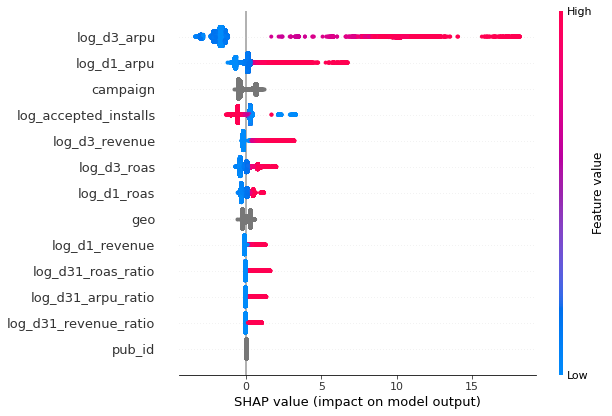

<IPython.core.display.Javascript object>

In [16]:
shap_values = model.get_feature_importance(data=train_pool, fstr_type="ShapValues")
shap.summary_plot(
    shap_values[:, :-1],
    features=train_set.loc[
        :,
        [
            "geo",
            "campaign",
            "pub_id",
            "log_accepted_installs",
            "log_d1_revenue",
            "log_d3_revenue",
            "log_d1_roas",
            "log_d3_roas",
            "log_d1_arpu",
            "log_d3_arpu",
            "log_d31_revenue_ratio",
            "log_d31_roas_ratio",
            "log_d31_arpu_ratio",
        ],
    ],
)

---

# Predict and save model

In [17]:
# Save model
# model.save_model("arpu_model.cb")

<IPython.core.display.Javascript object>

In [18]:
# Predict arpu
d7_arpu_preditions = np.e ** model.predict(test_pool)

<IPython.core.display.Javascript object>